In [1]:
import os
import re
import matplotlib.pyplot as plt

def extract_keff_and_error(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if 'ANA_KEFF' in line:
                try:
                    keff_val = float(line[47:58])
                    keff_err = float(line[59:66])
                    return keff_val, keff_err
                except ValueError:
                    pass
    return None, None

def get_numeric_suffix(filename):
    # Match something like: fission_blanket_hex_10_res.m → 10
    #match = re.search(r'fission_blanket_hex_(\d+)_res\.m$', filename)
    #match = re.search(r'input_(\d+)_(\d+)_(d+)\.txt_res\.m$', filename)
    #return int(match.group(1)) if match else float('inf')
    match = re.search(r'input(\d+)_15_(\d+)\.txt_res', filename)
    return match.group(1) if match else ""

def read_keff_from_folder(folder_path):
    keff_values = []
    keff_errors = []
    numeric_labels = []

    all_files = [f for f in os.listdir(folder_path) if f.endswith('_res.m')]
    sorted_files = sorted(all_files, key=get_numeric_suffix)

    for file_name in sorted_files:
        number = get_numeric_suffix(file_name)
        file_path = os.path.join(folder_path, file_name)
        keff, err = extract_keff_and_error(file_path)
        if keff is not None:
            keff_values.append(keff)
            keff_errors.append(err)
            numeric_labels.append(number)

    return numeric_labels, keff_values, keff_errors

def plot_keff(labels, keff_values, keff_errors):
    if not labels:
        print("[ERROR] No keff data found.")
        return
    plt.figure(figsize=(10, 5))
    plt.errorbar(labels, keff_values, yerr=keff_errors, fmt='o-', capsize=5)
    plt.xticks(labels)
    plt.xlabel('Reflector Thickness [cm]')
    plt.ylabel('keff')
    plt.title('Optimal Reflector Thickness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Your folder here ===
folder_path = '/Users/maxle/Desktop/Desktop2/Dual/10_15_20' 


#labels, keff_values, keff_errors = read_keff_from_folder(folder_path)
#plot_keff(labels, keff_values, keff_errors)




In [2]:
import numpy as np
klist5 = []
klist10 = []
klist15 = []
klist20 = []
range_outer = np.arange(0,60, 10)
range_inner = np.arange(0,40,10)
print(range_inner)

[ 0 10 20 30]


In [3]:
for i in range_outer:
     for j in range_inner:
          klist5.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/5/{i}_5_{j}')[1])
          klist10.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/10/{i}_10_{j}')[1])
          klist15.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/15/{i}_15_{j}')[1])
          klist20.append(read_keff_from_folder(f'/Users/maxle/Desktop/Desktop2/20/{i}_20_{j}')[1])
          

In [4]:
innerlist = [0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30, 0, 10, 20, 30]
len(innerlist)

24

In [5]:
outerlist = [0, 0, 0, 0, 10, 10, 10, 10, 20, 20, 20, 20, 30, 30, 30, 30, 40, 40, 40, 40, 50, 50, 50, 50]
len(outerlist)

24

In [6]:

def cylvol(inner, outer, fis_radius, height = 100):
     fus_radius = 25 #25 cm of fusion core radius
     shell_vol = np.pi * height * (((inner + fus_radius)**2 - fus_radius**2) + ((outer + fis_radius + inner + fus_radius)**2 - (fis_radius + inner + fus_radius)**2))
     cap_vol = np.pi * 2 * outer * (outer + fis_radius + inner + fus_radius)**2
     tot_vol = shell_vol + cap_vol
     return tot_vol, shell_vol, cap_vol


In [7]:
volume_list5 = []
volume_list10 = []
volume_list15 = []
volume_list20 = []
for i in range(len(klist5)):
    volume_list5.append(cylvol(innerlist[i], outerlist[i], 5)[0])
    volume_list10.append(cylvol(innerlist[i], outerlist[i], 10)[0])
    volume_list15.append(cylvol(innerlist[i], outerlist[i], 15)[0])
    volume_list20.append(cylvol(innerlist[i], outerlist[i], 20)[0])

In [8]:
def vol_to_tonne(volume, rho):
     tonnes = volume * rho * 1e-6
     return tonnes

In [141]:
UN_rho = 14.31
Zr_rho = 8.57
fuel_pin_mass = np.pi * 1000 * ((0.645**2 * UN_rho) + ((0.75)**2 - (0.6675)**2) * Zr_rho) #Cylinder volume for concentric cylinders. First one is an initial cylinder with a density of 14.1, and the other is the 1Zr with a density of 8.57
fuel_pin_volume = np.pi * 1000 * (0.75)**2
Li_rho = 0.516
C_rho = 1.7
Zr7_rho = 2.571
heat_pipe_mass = np.pi * 1000 * (0.64**2 * Li_rho + ((0.66)**2 - (0.64)**2) * Zr7_rho + ((0.71)**2 - (0.66)**2) * Li_rho + ((00.75)**2 - (0.71)**2) * Zr_rho)
hollow_heat_pipe_mass = np.pi * 1000 * (0.64**2 * 0 + ((0.66)**2 - (0.64)**2) * Zr7_rho + ((0.71)**2 - (0.66)**2) * Li_rho + ((0.75)**2 - (0.71)**2) * Zr_rho)
heat_pipe_volume = np.pi * 1000 * (0.75)**2
print(fuel_pin_volume * 1638)

2894584.9312012955


In [142]:
fuel_pins5 = 254 
fuel_pins10 = 656
fuel_pins15 = 1144
fuel_pins20 = 1638 #These are all hard coded, taken from the number given Alik gave me
heat_pipes5 = 88
heat_pipes10 = 220
heat_pipes15 = 386
heat_pipes20 = 552 #Similarly hard coded
pins_list = 6 * [fuel_pins5, fuel_pins10, fuel_pins15, fuel_pins20]
pipes_list = 6 * [heat_pipes5, heat_pipes10, heat_pipes15, heat_pipes20]
blanket_thickness = 6 * [5, 10, 15, 20]

In [143]:
def blanket_mass(height, pins, pin_mass, pin_volume, pipes, pipe_mass, pipe_volume, inner, thickness, filler_rho):
     mass = pins * pin_mass + pipes * pipe_mass + (np.pi * height * ((25 + inner + thickness)**2 - (25 + inner)**2) - pins * pin_volume - pipes * pipe_volume) * filler_rho
     return mass

In [144]:
blanket_list5 = []
blanket_list10 = []
blanket_list15 = []
blanket_list20 = []
for i in range(len(pins_list)): #pins list is arbitrary, they're all the same size. Followup, pins list is outdated, still doesn't matter. 
     blanket_list5.append((blanket_mass(1000, fuel_pins5, fuel_pin_mass, fuel_pin_volume, heat_pipes5, hollow_heat_pipe_mass, heat_pipe_volume, innerlist[i], 5, C_rho)) * 1e-6)
     blanket_list10.append((blanket_mass(1000, fuel_pins10, fuel_pin_mass, fuel_pin_volume, heat_pipes10, hollow_heat_pipe_mass, heat_pipe_volume, innerlist[i], 10, C_rho)) * 1e-6)
     blanket_list15.append((blanket_mass(1000, fuel_pins15, fuel_pin_mass, fuel_pin_volume, heat_pipes15, hollow_heat_pipe_mass, heat_pipe_volume, innerlist[i], 15, C_rho)) * 1e-6)
     blanket_list20.append((blanket_mass(1000, fuel_pins20, fuel_pin_mass, fuel_pin_volume, heat_pipes20, hollow_heat_pipe_mass, heat_pipe_volume, innerlist[i], 20, C_rho)) * 1e-6)
print(blanket_list5)

[6.158155777458915, 6.69222652856918, 7.226297279679445, 7.760368030789709, 6.158155777458915, 6.69222652856918, 7.226297279679445, 7.760368030789709, 6.158155777458915, 6.69222652856918, 7.226297279679445, 7.760368030789709, 6.158155777458915, 6.69222652856918, 7.226297279679445, 7.760368030789709, 6.158155777458915, 6.69222652856918, 7.226297279679445, 7.760368030789709, 6.158155777458915, 6.69222652856918, 7.226297279679445, 7.760368030789709]


In [145]:
tonne_list5 = []
tonne_list10 = []
tonne_list15 = []
tonne_list20 = []
for i in range(len(volume_list5)):
     tonne_list5.append(vol_to_tonne(volume_list5[i], C_rho) + blanket_list5[i])
     tonne_list10.append(vol_to_tonne(volume_list10[i], C_rho) + blanket_list10[i])
     tonne_list15.append(vol_to_tonne(volume_list15[i], C_rho) + blanket_list15[i])
     tonne_list20.append(vol_to_tonne(volume_list20[i], C_rho) + blanket_list20[i])


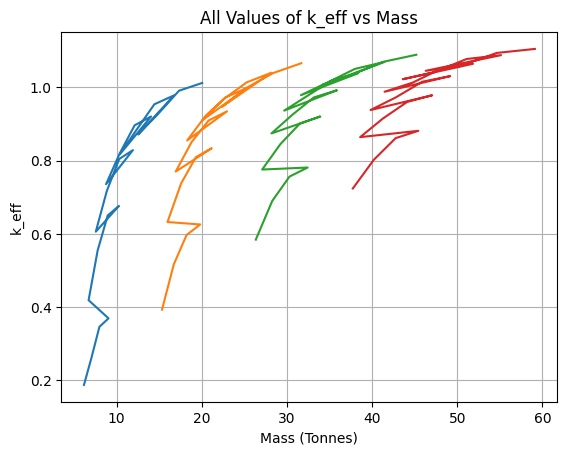

In [146]:
ax1 = plt.axes()
ax1.grid()
ax1.set_xlabel('Mass (Tonnes)')
ax1.set_ylabel('k_eff')
ax1.set_title('All Values of k_eff vs Mass')
ax1.plot(tonne_list5, klist5)
ax1.plot(tonne_list10, klist10)
ax1.plot(tonne_list15, klist15)
ax1.plot(tonne_list20, klist20)

In [147]:
def remove_backtracking(list1, list2):
    """
    Removes entries from both lists that would cause backtracking in list1.
    Both lists must be of the same length.
    """
    if len(list1) != len(list2):
        raise ValueError("Lists must be of the same length")
    
    # Extract values from nested lists in list1
    values1 = [x[0] if isinstance(x, list) else x for x in list1]
    
    result1 = []
    result2 = []
    
    # Add the first point
    current_max = values1[0]
    result1.append(list1[0])
    result2.append(list2[0])
    
    # Check each subsequent point
    for i in range(1, len(values1)):
        if values1[i] > current_max:  # Only keep points that increase
            current_max = values1[i]
            result1.append(list1[i])
            result2.append(list2[i])
    
    return result1, result2

In [148]:
#trim_list = klist
#trim_volume = volume_list
#trim_tonne = tonne_list

In [149]:
#trim_list, trim_tonne = remove_backtracking(trim_list, trim_tonne)

In [150]:
#ax2 = plt.axes()
#ax2.grid()
#ax2.set_xlabel('Mass (Tonnes)')
#ax2.set_ylabel('k_eff')
#ax2.set_title('Only increasing k_eff Values vs Mass')
#ax2.plot(trim_tonne, trim_list)

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

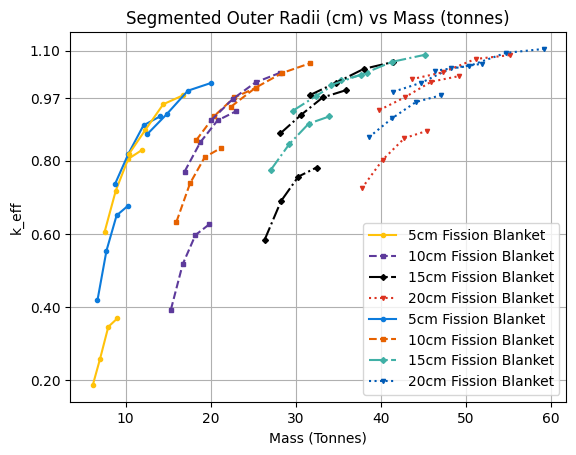

In [151]:
ax3 = plt.axes()
ax3.plot(tonne_list5[:4], klist5[:4], label = '5cm Fission Blanket', ls = '-', c = '#FFC20A', marker = 'o', ms = '3')
ax3.plot(tonne_list10[:4], klist10[:4], label = '10cm Fission Blanket', ls = '--', c = '#5D3A9B', marker = 's', ms = '3')
ax3.plot(tonne_list15[:4], klist15[:4], label = '15cm Fission Blanket', ls = '-.', c = '#000000', marker = 'D', ms = '3')
ax3.plot(tonne_list20[:4], klist20[:4], label = '20cm Fission Blanket', ls = ':', c = '#DC3220', marker = 'v', ms = '3')
ax3.plot(tonne_list5[4:8], klist5[4:8], label = '5cm Fission Blanket', ls = '-', c = '#0C7BDC', marker = 'o', ms = '3')
ax3.plot(tonne_list10[4:8], klist10[4:8], label = '10cm Fission Blanket', ls = '--', c = '#E66100', marker = 's', ms = '3')
ax3.plot(tonne_list15[4:8], klist15[4:8], label = '15cm Fission Blanket', ls = '-.', c = '#40B0A6', marker = 'D', ms = '3')
ax3.plot(tonne_list20[4:8], klist20[4:8], label = '20cm Fission Blanket', ls = ':', c = '#005AB5', marker = 'v', ms = '3')
ax3.plot(tonne_list5[8:12], klist5[8:12], ls = '-', c = '#FFC20A', marker = 'o', ms = '3')
ax3.plot(tonne_list10[8:12], klist10[8:12], ls = '--', c = '#5D3A9B', marker = 's', ms = '3')
ax3.plot(tonne_list15[8:12], klist15[8:12], ls = '-.', c = '#000000', marker = 'D', ms = '3')
ax3.plot(tonne_list20[8:12], klist20[8:12], ls = ':', c = '#DC3220', marker = 'v', ms = '3')
ax3.plot(tonne_list5[12:16], klist5[12:16], ls = '-', c = '#0C7BDC', marker = 'o', ms = '3')
ax3.plot(tonne_list10[12:16], klist10[12:16], ls = '--', c = '#E66100', marker = 's', ms = '3')
ax3.plot(tonne_list15[12:16], klist15[12:16], ls = '-.', c = '#40B0A6', marker = 'D', ms = '3')
ax3.plot(tonne_list20[12:16], klist20[12:16], ls = ':', c = '#005AB5', marker = 'v', ms = '3')
ax3.plot(tonne_list5[16:20], klist5[16:20], ls = '-', c = '#FFC20A', marker = 'o', ms = '3')
ax3.plot(tonne_list10[16:20], klist10[16:20], ls = '--', c = '#5D3A9B', marker = 's', ms = '3')
ax3.plot(tonne_list15[16:20], klist15[16:20], ls = '-.', c = '#000000', marker = 'D', ms = '3')
ax3.plot(tonne_list20[16:20], klist20[16:20], ls = ':', c = '#DC3220', marker = 'v', ms = '3')
ax3.plot(tonne_list5[20:24], klist5[20:24], ls = '-', c = '#0C7BDC', marker = 'o', ms = '3')
ax3.plot(tonne_list10[20:24], klist10[20:24], ls = '--', c = '#E66100', marker = 's', ms = '3')
ax3.plot(tonne_list15[20:24], klist15[20:24], ls = '-.', c = '#40B0A6', marker = 'D', ms = '3')
ax3.plot(tonne_list20[20:24], klist20[20:24], ls = ':', c = '#005AB5', marker = 'v', ms = '3')
ax3.grid()
ax3.legend()
ax3.set_yticks((0.2, 0.4, 0.6, 0.8, 0.97, 1.1))
ax3.set_xlabel('Mass (Tonnes)')
ax3.set_ylabel('k_eff')
ax3.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

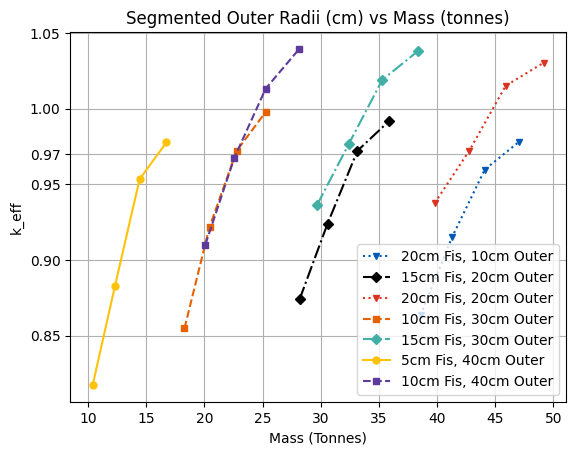

In [152]:
ax4 = plt.axes()
ax4.plot(tonne_list20[4:8], klist20[4:8], label = '20cm Fis, 10cm Outer', ls = ':', c = '#005AB5', marker = 'v', ms = '5')
ax4.plot(tonne_list15[8:12], klist15[8:12], label = '15cm Fis, 20cm Outer', ls = '-.', c = '#000000', marker = 'D', ms = '5')
ax4.plot(tonne_list20[8:12], klist20[8:12], label = '20cm Fis, 20cm Outer', ls = ':', c = '#DC3220', marker = 'v', ms = '5')
ax4.plot(tonne_list10[12:16], klist10[12:16], label = '10cm Fis, 30cm Outer', ls = '--', c = '#E66100', marker = 's', ms = '5')
ax4.plot(tonne_list15[12:16], klist15[12:16], label = '15cm Fis, 30cm Outer', ls = '-.', c = '#40B0A6', marker = 'D', ms = '5')
ax4.plot(tonne_list5[16:20], klist5[16:20], label = '5cm Fis, 40cm Outer', ls = '-', c = '#FFC20A', marker = 'o', ms = '5')
ax4.plot(tonne_list10[16:20], klist10[16:20],label = '10cm Fis, 40cm Outer', ls = '--', c = '#5D3A9B', marker = 's', ms = '5')
ax4.grid()
ax4.legend()
ax4.set_yticks((0.85, 0.90, 0.95, 0.97, 1.0, 1.05))
ax4.set_xlabel('Mass (Tonnes)')
ax4.set_ylabel('k_eff')
ax4.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

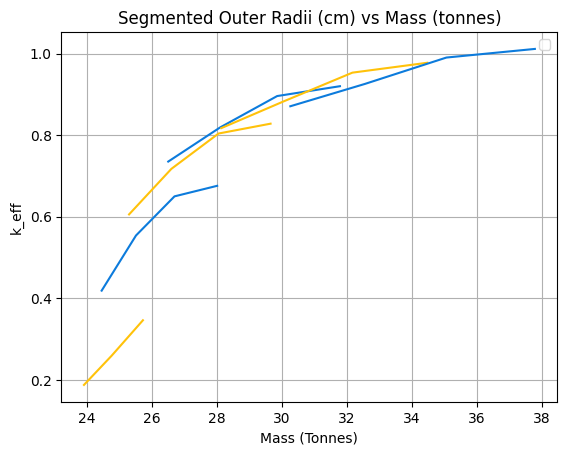

In [84]:
ax5 = plt.axes()
ax5.plot(tonne_list5[:3], klist5[:3], ls = '-', c = '#FFC20A')
ax5.plot(tonne_list5[4:8], klist5[4:8], ls = '-', c = '#0C7BDC')
ax5.plot(tonne_list5[8:12], klist5[8:12], ls = '-', c = '#FFC20A')
ax5.plot(tonne_list5[12:16], klist5[12:16], ls = '-', c = '#0C7BDC')
ax5.plot(tonne_list5[16:20], klist5[16:20], ls = '-', c = '#FFC20A')
ax5.plot(tonne_list5[20:24], klist5[20:24], ls = '-', c = '#0C7BDC')
ax5.grid()
ax5.set_xlabel('Mass (Tonnes)')
ax5.set_ylabel('k_eff')
ax5.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

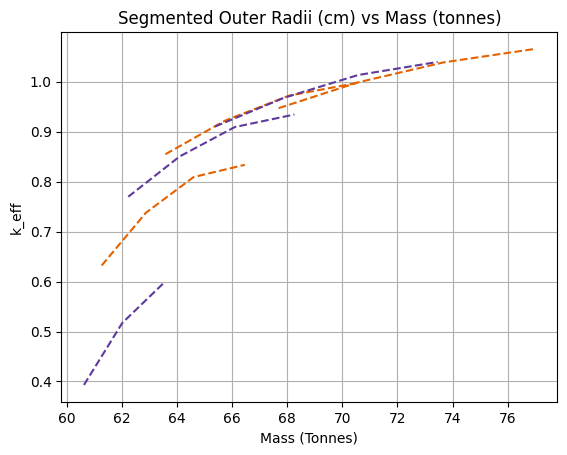

In [88]:
ax6 = plt.axes()
ax6.plot(tonne_list10[:3], klist10[:3], ls = '--', c = '#5D3A9B')
ax6.plot(tonne_list10[4:8], klist10[4:8], ls = '--', c = '#E66100')
ax6.plot(tonne_list10[8:12], klist10[8:12], ls = '--', c = '#5D3A9B')
ax6.plot(tonne_list10[12:16], klist10[12:16], ls = '--', c = '#E66100')
ax6.plot(tonne_list10[16:20], klist10[16:20], ls = '--', c = '#5D3A9B')
ax6.plot(tonne_list10[20:24], klist10[20:24], ls = '--', c = '#E66100')
ax6.grid()
ax6.set_xlabel('Mass (Tonnes)')
ax6.set_ylabel('k_eff')
ax6.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

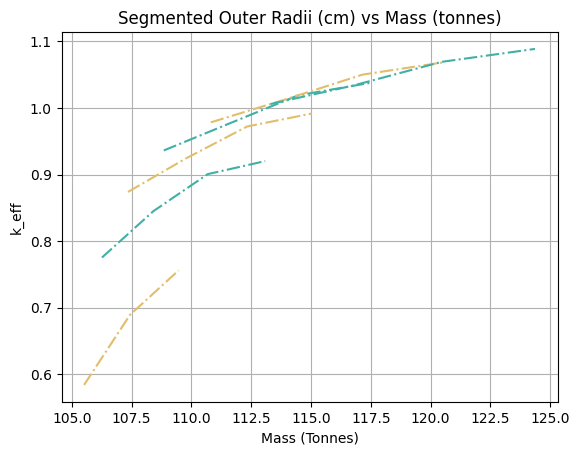

In [91]:
ax7 = plt.axes()
ax7.plot(tonne_list15[:3], klist15[:3], ls = '-.', c = '#000000')
ax7.plot(tonne_list15[4:8], klist15[4:8], ls = '-.', c = '#40B0A6')
ax7.plot(tonne_list15[8:12], klist15[8:12], ls = '-.', c = '#000000')
ax7.plot(tonne_list15[12:16], klist15[12:16], ls = '-.', c = '#40B0A6')
ax7.plot(tonne_list15[16:20], klist15[16:20], ls = '-.', c = '#000000')
ax7.plot(tonne_list15[20:24], klist15[20:24], ls = '-.', c = '#40B0A6')
ax7.grid()
ax7.set_xlabel('Mass (Tonnes)')
ax7.set_ylabel('k_eff')
ax7.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')

Text(0.5, 1.0, 'Segmented Outer Radii (cm) vs Mass (tonnes)')

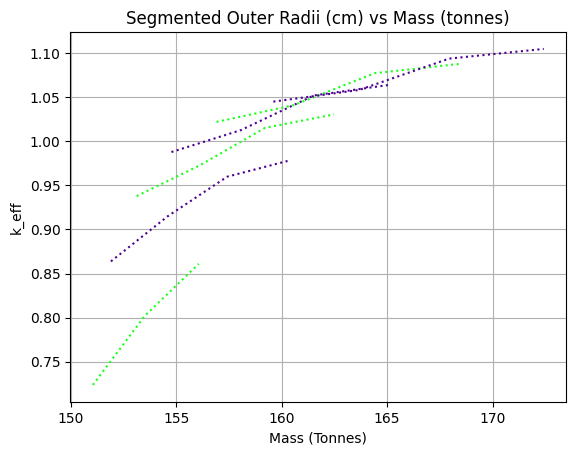

In [92]:
ax8 = plt.axes()
ax8.plot(tonne_list20[:3], klist20[:3],  ls = ':', c = '#1AFF1A')
ax8.plot(tonne_list20[4:8], klist20[4:8],  ls = ':', c = '#4B0092')
ax8.plot(tonne_list20[8:12], klist20[8:12], ls = ':', c = '#1AFF1A')
ax8.plot(tonne_list20[12:16], klist20[12:16], ls = ':', c = '#4B0092')
ax8.plot(tonne_list20[16:20], klist20[16:20], ls = ':', c = '#1AFF1A')
ax8.plot(tonne_list20[20:24], klist20[20:24], ls = ':', c = '#4B0092')
ax8.grid()
ax8.set_xlabel('Mass (Tonnes)')
ax8.set_ylabel('k_eff')
ax8.set_title('Segmented Outer Radii (cm) vs Mass (tonnes)')